In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from mpl_toolkits.mplot3d import Axes3D
import random

[0.0, 0.0, 0.0]
[0.0, 0.0, 4.05]
[0.0, 0.0, 8.1]
[0.0, 4.05, 0.0]
[0.0, 4.05, 4.05]
[0.0, 4.05, 8.1]
[0.0, 8.1, 0.0]
[0.0, 8.1, 4.05]
[0.0, 8.1, 8.1]
[4.05, 0.0, 0.0]
[4.05, 0.0, 4.05]
[4.05, 0.0, 8.1]
[4.05, 4.05, 0.0]
[4.05, 4.05, 4.05]
[4.05, 4.05, 8.1]
[4.05, 8.1, 0.0]
[4.05, 8.1, 4.05]
[4.05, 8.1, 8.1]
[8.1, 0.0, 0.0]
[8.1, 0.0, 4.05]
[8.1, 0.0, 8.1]
[8.1, 4.05, 0.0]
[8.1, 4.05, 4.05]
[8.1, 4.05, 8.1]
[8.1, 8.1, 0.0]
[8.1, 8.1, 4.05]
[8.1, 8.1, 8.1]
       X      Y      Z          x           y          z
0  0.000  0.000  0.000  87.387039  110.004455  34.160960
1  2.025  2.025  0.000   0.547983  -41.431941  19.402041
2  2.025  0.000  2.025  71.137539   30.778754  40.598987
3  0.000  2.025  2.025 -14.984724  -36.811138  78.029814
4  0.000  0.000  4.050  30.686113  -49.768557   6.491618


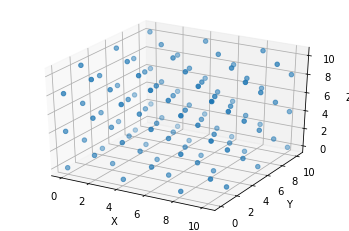

In [3]:
%matplotlib inline




a = 4.05
center = [0,0,0]

global df
df = pd.DataFrame(columns=list("XYZ"))
# df.loc[len(df)]=[0,0,0]

def speedinitial():
  KB= 1.38064 * 1e-23 #m2kgs-2k-1
  T=10 #K
  wm= 4.48039 * 1e-26 #kg
  l=np.zeros(12)
  for i in range(0,12):
    l[i]=random.random()
    #print(l[i])
  #print(sum(l))
  v=math.sqrt(KB*T/wm)*(sum(l)-6)
  return v


def fcc(center):
  x1 = center[0]; y1 = center[1]; z1 = center[2]
  x2 = center[0] + a/2; y2 = center[1] + a/2; z2 = center[2]
  x3 = center[0] + a/2; y3 = center[1]; z3 = center[2] + a/2
  x4 = center[0]; y4 = center[1] + a/2; z4 = center[2]+a/2
  #v1, v2, v3 = 0, 0, 0 #initial the speed
  v1=speedinitial()
  v2=speedinitial()
  v3=speedinitial()
  v4=speedinitial()
  v5=speedinitial()
  v6=speedinitial()
  v7=speedinitial()
  v8=speedinitial()
  v9=speedinitial()
  v10=speedinitial()
  v11=speedinitial()
  v12=speedinitial()
  cell = pd.DataFrame(
      [
       [x1,y1,z1,v1,v2,v3],
       [x2,y2,z2,v4,v5,v6],
       [x3,y3,z3,v7,v8,v9],
       [x4,y4,z4,v10,v11,v12]
       ],
       columns=list('XYZxyz'))
  return cell

def movecenter(nx,ny,nz):
  appended_data=[]
  for i in range(nx):
   for j in range(ny):
    for k in range(nz):
       center=[i*a,j*a,k*a]
       print(center)
       cell=fcc(center)
         #print(cell)
       appended_data.append(cell)
        #  pd.concat([df,df3],ignore_index=True)
  appended_data = pd.concat(appended_data)
  return appended_data

def dataview():
  df = pd.read_csv('data.csv', parse_dates=True)
  print(df.head())
  threedee = plt.figure().gca(projection='3d')
  threedee.scatter(df['X'], df['Y'], df['Z'])
  threedee.set_xlabel('X')
  threedee.set_ylabel('Y')
  threedee.set_zlabel('Z')
  plt.show()

appended_data=movecenter(3,3,3) 
appended_data=appended_data.drop_duplicates()

appended_data.to_csv('data.csv',index=False)
dataview()

In [4]:
def v(rang):
  ep = 0.2703
  al = 1.1646
  ro = 3.253
  ev = 1.6021892e-19
  return ep*(math.exp(-2.0*al*(rang-ro)/ro)-2.0*math.exp(-al*(rang-ro)/ro)) *ev

def vp(rang):
  ep = 0.2703
  al = 1.1646
  ro = 3.253
  ev = 1.6021892e-19
#  return ep*(math.exp(-2.0*al*(rang-ro)/ro)-2.0*math.exp(-al*(rang-ro)/ro)) *ev*1e10
  return -2.0*al*ep*(math.exp(-2.0*al*(rang-ro))-math.exp(-al*(rang-ro))) *ev*1.0e10

def threeatoms1():
  rx=[]
  ry=[]
  rz=[]
  vx=[]
  vy=[]
  vz=[]
  fz=[]
  fx=[]
  fy=[]
  epot=[]
  obj=[]
  dt = 1.0e-13
  wm=1.6726e-27
  
  #read initial position and velocity
  f = open('data.csv','r')
  next(f)
  n=0

  for line in f:
    xy = line.split(',')
    rx = rx + [float(xy[0])]
    ry = ry + [float(xy[1])]
    rz = rz + [float(xy[2])]
    vx = vx + [float(xy[3])]
    vy = vy + [float(xy[4])]
    vz = vz + [float(xy[5])]
    fx = fx + [0]
    fy = fy + [0]
    fz = fz + [0]
    epot = epot + [0]
    #obj = obj + [drawatom(rx[n],ry[n])] # obj[] holds pointer to object
    n = n + 1 # number of total atoms
  print("number of atoms = ",n)
  f.close()
  
  # rx[1]=0; ry[1]=0; rz[1]=0 # Atom position (m)
  # rx[2]=5e-10; ry[2]=0
  # rx[3]=5e-10; ry[3]=5e-10 # Atom position (m)
  # vx[1] = 0.0e3; vy[1] = 0.0e3 # Velocity (m/s)
  # vx[2] = 0.0e3; vy[2] = 0.0e3 # Velocity (m/s)
  # vx[3] = 0.0e3; vy[3] = 0.0e3 # Velocity (m/s)
  # fx = 0.0e0; fy = 0.0e0 # Force (N)
  # epot = 0.0e0 # Potential energy
  
  output = {}
  step = 0
  stepend = 1000
  L=a*4
  for i in range(stepend):
    output["step {}".format(i + 1)] = {}

  for step in range(stepend):
    #verlet 1
    for j in range(n):
      rx[j] = rx[j] + dt*vx[j] + (dt*dt/2)*fx[j]/wm
      ry[j] = ry[j] + dt*vy[j] + (dt*dt/2)*fy[j]/wm
      rz[j] = rz[j] + dt*vz[j] + (dt*dt/2)*fz[j]/wm
      if rx[j]>L :
          rx[j]=rx[j]-L
      if ry[j]>L :
          ry[j]=ry[j]-L
      if rz[j]>L :
          rz[j]=rz[j]-L
      if rx[j]<0 :
          rx[j]=L+rx[j]
      if ry[j]<0 :
          ry[j]=L+ry[j]
      if rz[j]<0 :
          rz[j]=L+rz[j]
      vx[j] = vx[j] + dt/2*fx[j]/wm
      vy[j] = vy[j] + dt/2*fy[j]/wm
      vz[j] = vz[j] + dt/2*fz[j]/wm

    #Force and energy
    for i in range (n):
      fx[i]=0
      fy[i]=0
      fz[i]=0
      epot[i]=0
      cutoff=L/2
      
    for i in range (n):
      for j in range(n):
        if (i!=j):
          drx=rx[i]-rx[j]
          dry=ry[i]-ry[j]
          drz=rz[i]-rz[j]
          
          if drx > cutoff:
            drx=cutoff-drx
          if dry > cutoff:
            drx=cutoff-dry
          if drx > cutoff:
            dry=cutoff-dry
          if abs(drx) > cutoff: drx=0
          if abs(dry) > cutoff: dry=0
          if abs(drz) > cutoff: drz=0
          rr=math.sqrt((rx[i]-rx[j])**2+(ry[i]-ry[j])**2+(rz[i]-rz[j])**2)
                    
          fx[i]=fx[i]-vp(rr)/rr*drx
          fy[i]=fy[i]-vp(rr)/rr*dry
          fz[i]=fz[i]-vp(rr)/rr*drz
          epot[i]=epot[i]+v(rr)/2

    # Velet(2)
    for k in range(n):
      vx[k] = vx[k] + dt/2.0 * fx[k]/wm
      vy[k] = vy[k] + dt/2.0 * fy[k]/wm
      vz[k] = vz[k] + dt/2.0 * fz[k]/wm

    for i in range(n):
      output["step {}".format(step + 1)]["x{}".format(str(i + 1).zfill(3))] = rx[i]
      output["step {}".format(step + 1)]["y{}".format(str(i + 1).zfill(3))] = ry[i]
      output["step {}".format(step + 1)]["z{}".format(str(i + 1).zfill(3))] = rz[i] 
  np.save('output.npy', output)
  print(output)
threeatoms1()

number of atoms =  108


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
data = np.load("output.npy", allow_pickle=True).item()
data

Output hidden; open in https://colab.research.google.com to view.

In [14]:
data["step 105"]["z002"]

16.19999731621702

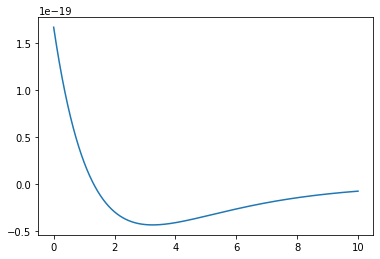

In [7]:
def v(rang):
  ep = 0.2703
  al = 1.1646
  ro = 3.253
  ev = 1.6021892e-19
  return ep*(math.exp(-2.0*al*(rang-ro)/ro)-2.0*math.exp(-al*(rang-ro)/ro)) *ev
x=[]
y=[]
for i in range(1,10000):
    x.append(i/1000)
    y.append(v(i/1000))
plt.plot(x,y)
plt.show()

In [0]:
n = 20
output = pd.DataFrame()
names = []
for i in range(n):
  names.append("x{}".format(i))
  names.append("y{}".format(i))
  names.append("z{}".format(i))
for i in range(len(names)):
  output[names[i]] = [1]
for i in range(len(names)):
  # output[names[i]] = output[names[i]] + [1]
  output[names[i]].append([1])

TypeError: ignored

In [0]:
import numpy as np
import random


KB= 1.38064 * 1e-23 #m2kgs-2k-1
T=300 #K
wm= 4.48039 * 1e-26 #kg
l=np.zeros(12)
for i in range(0,12):
  l[i]=random.random()
  print(l[i])
print(sum(l))
v=math.sqrt(KB*T/wm)*(sum(l)-6)
print (v)

0.6857348978887277
0.3356758932317563
0.9327005101552056
0.7004304471262478
0.2088085632735367
0.5912056224267894
0.7353852250572384
0.2675788390828825
0.273810723081399
0.15837778845732942
0.4686661080858453
0.910390053133817
6.268764671000775
81.71750981658572
